###### <h1><center> Laboratorio di WebScraping </h1>
<h1><center> Anno Accademico 2024-2025 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 16 </h1>
<h1><center>  Small World Networks </h1> 
<h1><center>  Community Detection</h1> 
<h1><center> 02 Aprile 2025 </h1>

## Erdos, Renyi: Clustering Coefficient

* studiamo il  **CC** di una **ER Networks** dal punto di vista teorico
* in un grafo di  **ER** 
    * la probabilità di mettere un arco tra due nodi è  **p**
    * in particolare, la probabilità che ci sia un arco tra due vicini è **p**
    * la percentuale di vicini con connessioni tra di loro è **p**
    * il **clustering coefficient** è uguale a **p**
* ad esempio, se  $p=0.2$,  sono presenti, in media, $20\%$ archi tra i nodi vicini
* ma questo deve essere considerato un valore **alto** oppure un valore **basso**?
    * le reti di **ER** caratterizzate da un alto valore di **p**, avranno molte connessioni tra i vicini, ma sono davvero clusterizzate?


## Clustering coefficient 

* il valore del clustering coefficient (CC) **varia tra 0 e 1**
* ma un valore alto del CC è sufficiente a concludere che la rete è clusterizzata?
    * valori del CC vicini a  1 implicano un alto livello di clustering?
    * valori del CC vicini a 0 implicano un basso livello di clustering ?
* questo non è necessariamente vero: una rete **molto densa** ha sempre un alto livello di clustering
* cosa vorremmo modellare
     * la probabilità di definire un arco tra due nodi incrementa se i due nodi hanno un vicino comune
     * ad esempio, in un grafo random, quando si mette un arco che chiude un triangolo, la probabilità di mettere
     quell'arco non aumenta perchè i due nodi hanno un vicino in comune, ma è costante
     * in questo caso la formazione di un triangolo è del tutto casuale


## Graph Density: definizione

* numero di archi esistenti in un grafo rispetto al massimo numero di archi che possono essere definiti nel grafo

<center>
<img src="Figures/density.jpg", width=400, height=400> 
</center>

* se $\rho$ è basso, allora la rete è **sparsa**, se  $\rho$  è grande, allora la rete è **densa**

## Graph Density: definition

<center>
<img src="Figures/density1.jpg", width=800, height=800> 
</center>

## Clustering Coefficient e Densità della rete

* per valutare se una rete è veramente clusterizzata
    * confrontare **CC** con la **densità** della rete
    * alta clusterizzazione se e solo se  **CC >> $\rho$**


<center> 
<img src="Figures/CC7.jpg",width=20000, height=20000> 
</center> 

## Erdos, Renyi: Conclusioni

* in un grafo random il grado medio dei nodi dipende dalla probabilità **p** con cui si inseriscono gli archi e dal numero di vertici del grafo. 
  * tutti i  nodi hanno grado simile
* il diametro della rete è **basso (logaritmico)**
*  il **coefficiente di clustering** 
    * è uguale alla densità
    * la rete non può essere considerate clusterizzata  
* anche se di diametro basso, queste reti non sono in grado di modellare la tendenza dei nodi a formare **comunità**, che  è una caratteristica di molte reti reali
* il basso coefficente di clustering permette di tenere basso il diametro
* la sfida è trovare un modello che mantenga basso il diametro, ma che presenti un coefficente di clustering più alto

## Small world networks

* un modello che descriva realmente reti sociali dovrebbe essere in grado di generare una rete **small world**,  caratterizzata da due proprietà
    * i nodi tendono a formare dei cluster. 
        * le small world networks tendono a contenere dei "sotto grafi" in cui i nodi sono molto connessi tra di loro
        * il coefficente di clusterizzazione è alto
    * coppie arbitrarie di nodi sono connesse da almeno "un cammino corto"

## Small world networks

<center>
<img src="Figures/SmallWorld.jpg" style="width:600px;height:600px;"/>
</center>

 ## Small world networks: the Oracle of Bacon

<center>
<img src="Figures/BaconOracle.jpg" style="width:800px;height:600px;"/>
</center>

## Small world networks: the Oracle of Bacon

* ogni attore ha un **grado di separazione** rispetto a Kevin Bacon di **3-4 links**
* il numero medio di Bacon è **2.78**
* sembra che Kevin Bacon, un attore relativamente poco famoso, risulti al centro di una rete di collaborazioni tra attori, ma questo non è vero
* Kevin Bacon ha un numero limitato di links con altri attori, ha recitato in un numero limitato di film, ma ha una bassa distanza rispetto a qualsiasi altro attore

<center>
<img src="Figures/KevinBacon.jpg" style="width:600px;height:400px;"/>
</center>

## Il modello di Watts e Strogatz

* Watts e Strogatz sono partiti dalla osservazione che i grafi random di Erdos-Renyi non sono in grado di modellare reti small world
* hanno considerato allora **reti regolari**
* una rete regolare è un grafo in cui
    * ogni nodo ha esattamente lo stesso numero di nodi vicini
    * la rete è formata ripetendo regolarmente lo stesso pattern
* Watts e Strogatz hanno utilizzato una particolare rete regolare, un **ring lattice**
* **ring lattice** di n nodi
    * i nodi sono organizzati in cerchio
    * ogni nodo è connesso con i **k nodi più vicini**


##  Ring lattice

<center> 
<img src="Figures/RingLattice.jpg",width=1000, height=1000> 
</center> 

## Generazione nodi vicini

In [46]:
def adjacent_edges(nodes, halfk): 
    n = len(nodes) 
    for i, u in enumerate(nodes): 
        for j in range(i+1, i+halfk+1): 
            v = nodes[j % n] 
            yield u, v
            

In [47]:
 nodes = range(3)
 for edge in adjacent_edges(nodes, 1):
     print(edge)
        

(0, 1)
(1, 2)
(2, 0)


## Generazione di Ring Lattice: 10 nodi, 2 vicini

In [3]:
def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G

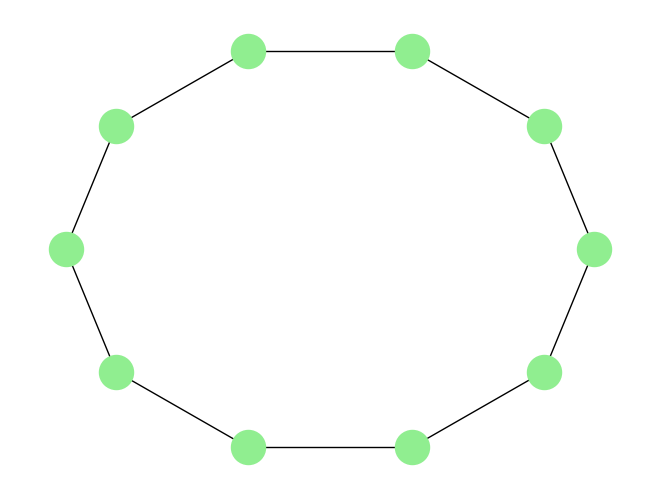

In [5]:
import networkx as nx
lattice = make_ring_lattice(10, 2)
nx.draw_circular(lattice, node_color='lightgreen', node_size=600)

## Generazione di Ring Lattice: 4 vicini

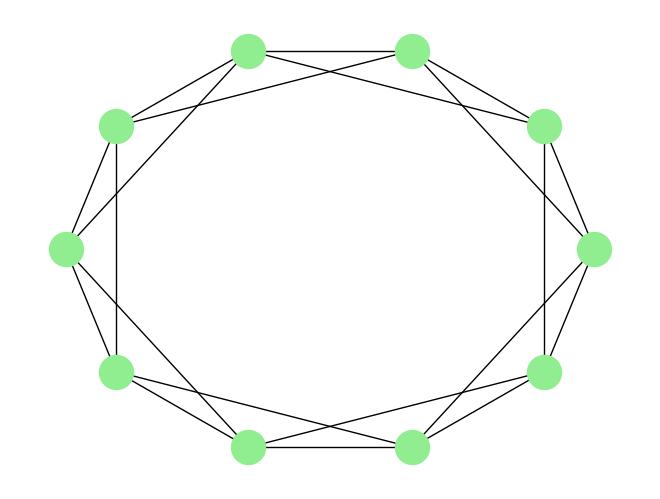

In [7]:
import networkx as nx
lattice = make_ring_lattice(10, 4)
nx.draw_circular(lattice, node_color='lightgreen', node_size=600)

## Il modello di Watts e Strogatz

* idee di base
    * una rete regolare possiede un alto livello di clusterizzazione, ma non è una rete small world perchè i cammini sono lunghi
    * una rete random possiede cammini brevi, ma non un alto livello di clusterizzazione
* cha la soluzione sia in un "modello di mezzo"?
    * **introdurre un livello di caos sufficiente per diminutire il grado di separazione tra i nodi**
    * un compromesso tra il caos e la regolarità

<center>
<img src="Figures/WattsStrogatz.jpg" style="width:1000px;height:400px;"/>
</center>

## Il modello di Watts e Strogatz

* iniziare con un ring lattice
* connettere ogni vertice a **k** vicini
* considerare ogni arco **e** del grafo e **riavvolgerlo**, con una probabilità **p**, ovvero
    * considerare **e**, un vertice **v** di **e**, e scegliere un altro vertice **v1**, in maniera uniforme tra tutti i vertici del grafo
    * gettare una monetina, che produce un output "testa" con probabilità **p**, definita secondo una distribuzione scelta
        * se è uscita testa, modificare **e**, facendolo puntare a **v1**
        * se è uscita croce, lasciare l'arco invariato


## Il modello di Watts e Strogatz in NetworkX

* per generare questi grafi con **Networkx**
    * **watts_strogatz_graph(n, k, p, seed)** 

* **n**:numero nodi
* **k**: numero di vicini di ogni nodo
* **p**: 0, per una rete regolare
* **seed** è un parametro opzionale

## Il modello di Watts e Strogatz

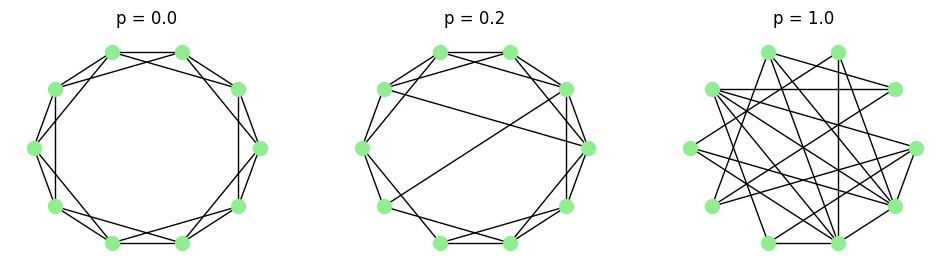

In [8]:
import matplotlib.pyplot as plt
n = 10
k = 4
ps = [0, 0.2, 1]
fig = plt.figure(figsize=(12, 3))
for i in range(3):
    ax = plt.subplot(1, 3, i+1)
    G = nx.watts_strogatz_graph(n, k, ps[i])
    ax.set_title('p = %.1f' % ps[i])
    nx.draw_circular(G, node_color='lightgreen', node_size=100)
plt.show()


* quando **p=0**, il grafo è regolare
* quando **p=1** il grafo è random
* i valori interessanti sono quelli intermedi.

## Il modello di Watts e Strogatz

In [9]:
n = 1000
k = 10
ps = [0, 0.02, 1]
print ("p     Clustering Coefficient     Path Length")
print ('-'*50)
for p in ps:
    G = nx.watts_strogatz_graph(n, k, p)
    C = nx.average_clustering(G)
    L = nx.average_shortest_path_length(G)
    print  (p,"\t", C,"\t", L)
    

p     Clustering Coefficient     Path Length
--------------------------------------------------
0 	 0.6666666666666666 	 50.450450450450454
0.02 	 0.6271766955266955 	 6.7142002002002
1 	 0.008287822351367243 	 3.2676456456456457


## Studio del modello al variare della probabilità p "di riavvolgimento"

In [10]:
import numpy as np
n_iter = 3
ps = np.logspace(-4, 0, 10)
Cp = np.zeros((n_iter, ps.size))
Lp = np.zeros((n_iter, ps.size))
for i in range(n_iter):
    for j in range(ps.size):
        G = nx.watts_strogatz_graph(n, k, ps[j])
        Cp[i,j] = nx.average_clustering(G)
        Lp[i,j] = nx.average_shortest_path_length(G)
# Normalized by L0, C0
for i in range(1, Cp.shape[1]):
    Cp[:,i] = Cp[:,i] / Cp[:,0]
    Lp[:,i] = Lp[:,i] / Lp[:,0]
Cp[:,0] = 1; Lp[:,0] = 1

# Averages over all iterations
Cs = np.mean(Cp, axis=0)
Ls = np.mean(Lp, axis=0)


* **np.logspace**: restituisce un insieme di valori
    * in un intervallo definito in scala logaritmica tra **le potenze -4 e  0 di 10**
    * uniformemente distribuiti nell'intervallo in scala logaritmica

## Studio del modello al variare della probabilità p "di riavvolgimento"

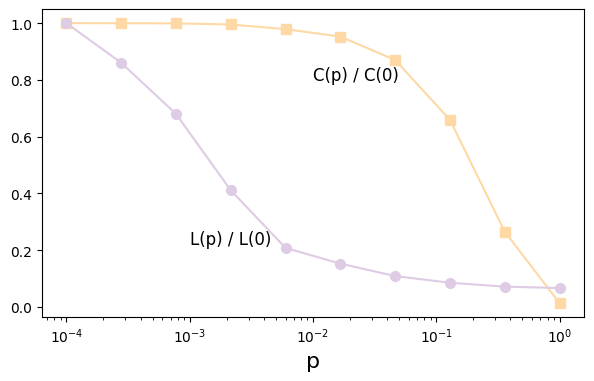

In [11]:
plt.figure(figsize=(7,4))
plt.plot(ps, Cs, marker='s', color='#FED9A6', markersize=7)
plt.plot(ps, Ls, marker='o', color='#DECBE4', markersize=7)
plt.xscale('log')
plt.text(0.01, 0.8, 'C(p) / C(0)', fontsize=12)
plt.text(0.001, 0.22, 'L(p) / L(0)', fontsize=12)
plt.xlabel('p', fontsize=16)
plt.show()

* per valori anche molto piccoli della probabilità **p**, la lunghezza media dei cammini minimi si abbassa drasticamente
* il coefficente di clusetring rimane invece alto

## La  scala logaritmica

* considerare l'asse **x** ed una serie di valori **x1,...,xn**
* trasformazione di variabili
    * **X = log(xi)**: ogni valore **xi** è rappresentato sull'asse delle x da una distanza dall'origine pari a **log(xi)**
* poichè per valori crescenti la curva logaritmica cresce  lentamente, la distanza di un punto dall'origine cresce via via più lentamente
    * il valore **1** si trova a distanza **0** dall'origine
    * il valore **10** si trova a distanza **1**
    * il valore **100** si trova a distanza **2** dall'origine
    * e così via...
* le potenze della base sono equamente distribuite, perchè il logaritmo restituisce i valori 1,2,3,...

## La  scala logaritmica

<center>
<img src="Figures/LogarithmicScale.jpg" style="width:1200px;height:100px;"/>
</center>

## La  scala logaritmica

* utile quando si deve disegnare una curva (o una distribuzione) che includa sia valori molto piccoli che valori molto grandi su uno o su entrambe gli assi
* invece di usare i valori originali, utilizziamo il loro **logaritmo**
* in questo modo è possibile visualizzare una grande quantità di dati con un range di variabilità molto ampio in modo effettivo
* **piccoli scostamenti** dei valori piccoli sono **amplificati**
* **grandi differenze** nei valori grandi vengono invece **compresse**
* **log plots** o **log log plots**

## La  scala logaritmica

<center>
<img src="Figures/LogarithmicArithmetic.jpg" style="width:800px;height:600px;"/>
</center>

## La rete sociale FriendHook è una small world?

In [15]:
import pandas as pd

def summarize_table(df):
    n_rows, n_columns = df.shape
    summary = df.describe()
    print(f"The table contains {n_rows} rows and {n_columns} columns.")
    print("Table Summary:\n")
    print(summary.to_string())

df_profile = pd.read_csv('Dataset/Profiles.csv')
print(df_profile.head())
summarize_table(df_profile)


     Profile_ID           Sex Relationship_Status          Dorm         Major  \
0  b8bc075e54b9  6fb336b554b6        9cea719429e9  4bb4df9e464e  827e5c7758c2   
1  49194b3720b6  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  3c285c164f0c   
2  f0f5962bbc52  6fb336b554b6        ac0b88e46e20  a8e6e404d1b3  f99bb3b6a185   
3  d42f06d92a52  6fb336b554b6        ac0b88e46e20  2a59be064efd  db85f196a0a8   
4  81123b29ee66  e807eb960650        9cea719429e9  a8e6e404d1b3  141d4cdd5aaf   

           Year  
0  c1a648750a4b  
1  8724226d4754  
2  c1a648750a4b  
3  222a76d38f58  
4  222a76d38f58  
The table contains 4039 rows and 6 columns.
Table Summary:

          Profile_ID           Sex Relationship_Status          Dorm         Major          Year
count           4039          4039                3631          4039          4039          4039
unique          4039             2                   3            15            30             4
top     cb4be25afda7  e807eb960650        ac0b88e46e20

## La rete sociale FriendHook è una small world?

In [16]:
import numpy as np
category_map = {'9cea719429e9': 0, np.nan: 1, '188f9a32c360': 2, 
                'ac0b88e46e20': 3}
col_to_mapping = {'Relationship_Status': category_map}

nums = [category_map[hash_code] for hash_code in df_profile.Relationship_Status.values]
df_profile['Relationship_Status'] = nums
print(df_profile.Relationship_Status)


0       0
1       3
2       3
3       3
4       0
       ..
4034    3
4035    0
4036    3
4037    3
4038    0
Name: Relationship_Status, Length: 4039, dtype: int64


## La rete sociale FriendHook è una small world?

In [17]:
for column in df_profile.columns:
    if column in col_to_mapping:
        continue 
        
    unique_ids = sorted(set(df_profile[column].values))
    category_map = {id_: i for i, id_ in enumerate(unique_ids)}
    col_to_mapping[column] = category_map
    
    nums = [category_map[hash_code] 
            for hash_code in df_profile[column].values]
    
    df_profile[column] = nums

head = df_profile.tail()
print(head.to_string(index=False))


 Profile_ID  Sex  Relationship_Status  Dorm  Major  Year
       1874    0                    3    12     11     1
       1514    1                    0    12      2     0
        732    0                    3    12     11     1
       2167    1                    3    12     11     1
       3203    0                    0     4     26     1


## La rete sociale FriendHook è una small world?

In [19]:
df_friends = pd.read_csv('Dataset/Friendships.csv')
print(df_friends.head())
summarize_table(df_friends)


       Friend_A      Friend_B
0  b8bc075e54b9  49194b3720b6
1  b8bc075e54b9  f0f5962bbc52
2  b8bc075e54b9  d42f06d92a52
3  b8bc075e54b9  81123b29ee66
4  b8bc075e54b9  b1b65a546a3e
The table contains 88234 rows and 2 columns.
Table Summary:

            Friend_A      Friend_B
count          88234         88234
unique          3646          4037
top     89581f99fa1e  97ba93d9b169
freq            1043           251


## La rete sociale FriendHook è una small world?

In [20]:
import networkx as nx
G = nx.Graph()
for id1, id2 in df_friends.values:
    node1 = col_to_mapping['Profile_ID'][id1]
    node2 = col_to_mapping['Profile_ID'][id2]
    G.add_edge(node1, node2)    
nodes = list(G.nodes)


## La rete sociale FriendHook è una small world? cammini minimi

In [21]:
import random
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
vals=df_profile.Profile_ID.nunique()
for i in range(10):
    n1=random.randint(1, vals)
    n2=random.randint(1, vals)
    print(shortest_path_lengths[n1][n2])
    

6
3
2
5
3
4
5
4
4
2


## La rete sociale FriendHook è una small world? il diametro

In [22]:
diameter=nx.diameter(G)
print(diameter)

8


* il diametro è basso (dell'ordine del logaritmo del numero dei nodi)

## La rete sociale FriendHook è una small world? Distribuzione della lunghezza dei cammini

Text(0, 0.5, 'Frequency (%)')

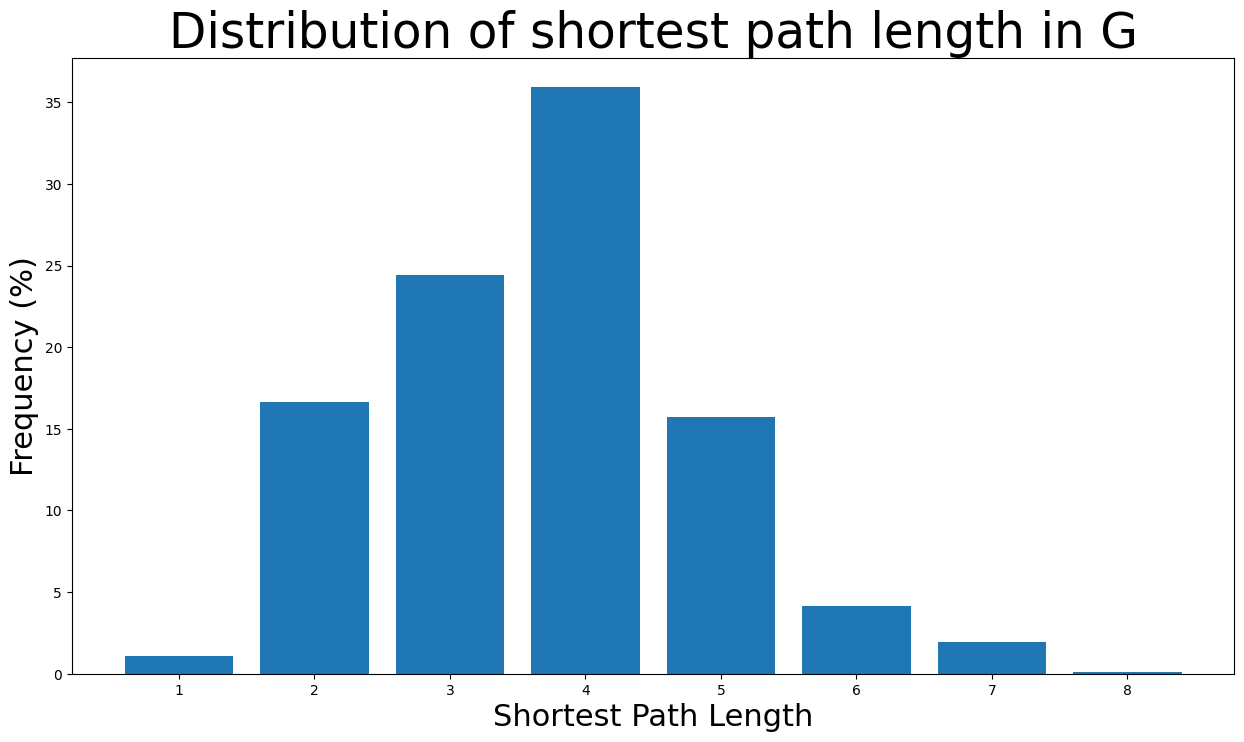

In [45]:
# Conosciamo la lunghezza del più lungo shortest path (il diametro), così possiamo creare un array
# per memorizzare i valori da 0 fino al valore del diametro
path_lengths = np.zeros(diameter + 1, dtype=int)
# Estrarre la frequenza degli shortest paths
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts
# esprimere la frequenza in percentuale (escludendo i valori uguali a 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()
# Plottare la distribuzione degli shortest paths (ignorando i path di lunghezza 0) come percentuale


## La rete sociale FriendHook è una small world? Distribuzione della lunghezza dei cammini

Text(0, 0.5, 'Frequency (%)')

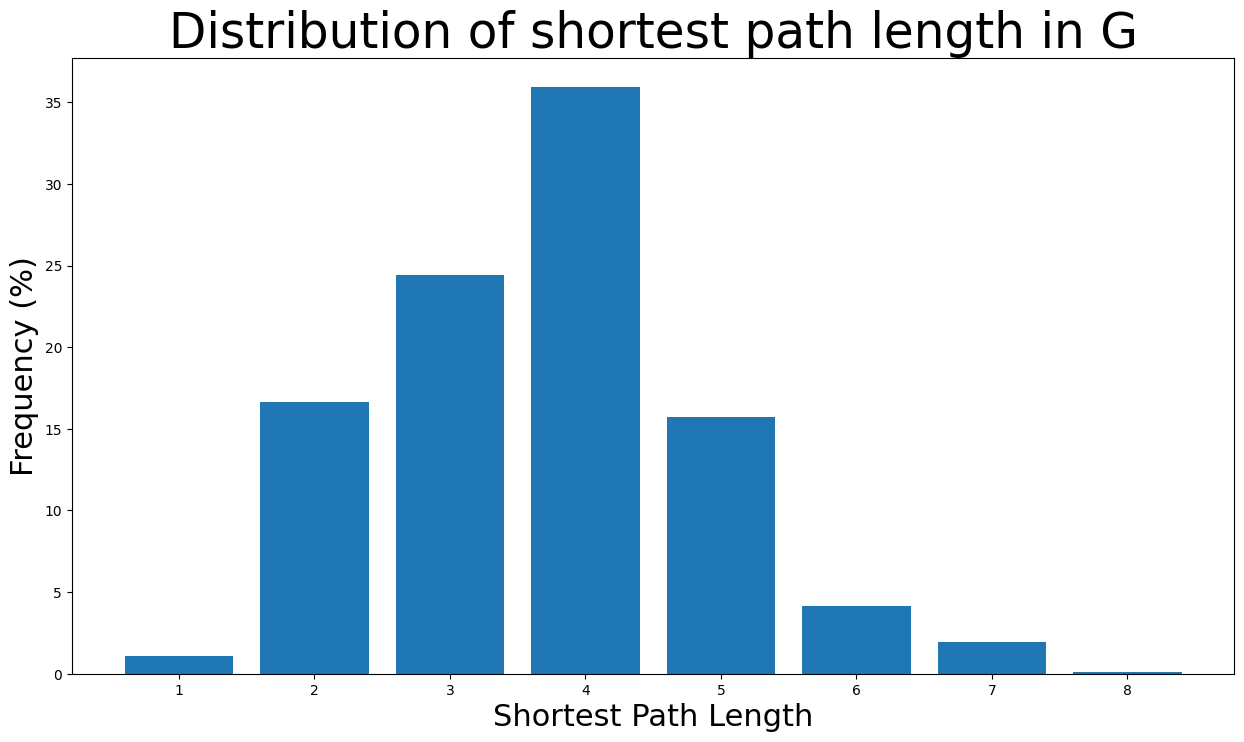

In [49]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title("Distribution of shortest path length in G", fontdict={"size": 35}, loc="center")
ax.set_xlabel("Shortest Path Length", fontdict={"size": 22})
ax.set_ylabel("Frequency (%)", fontdict={"size": 22})


## E' una rete small world? - Coefficente di clustering

Text(0, 0.5, 'Counts')

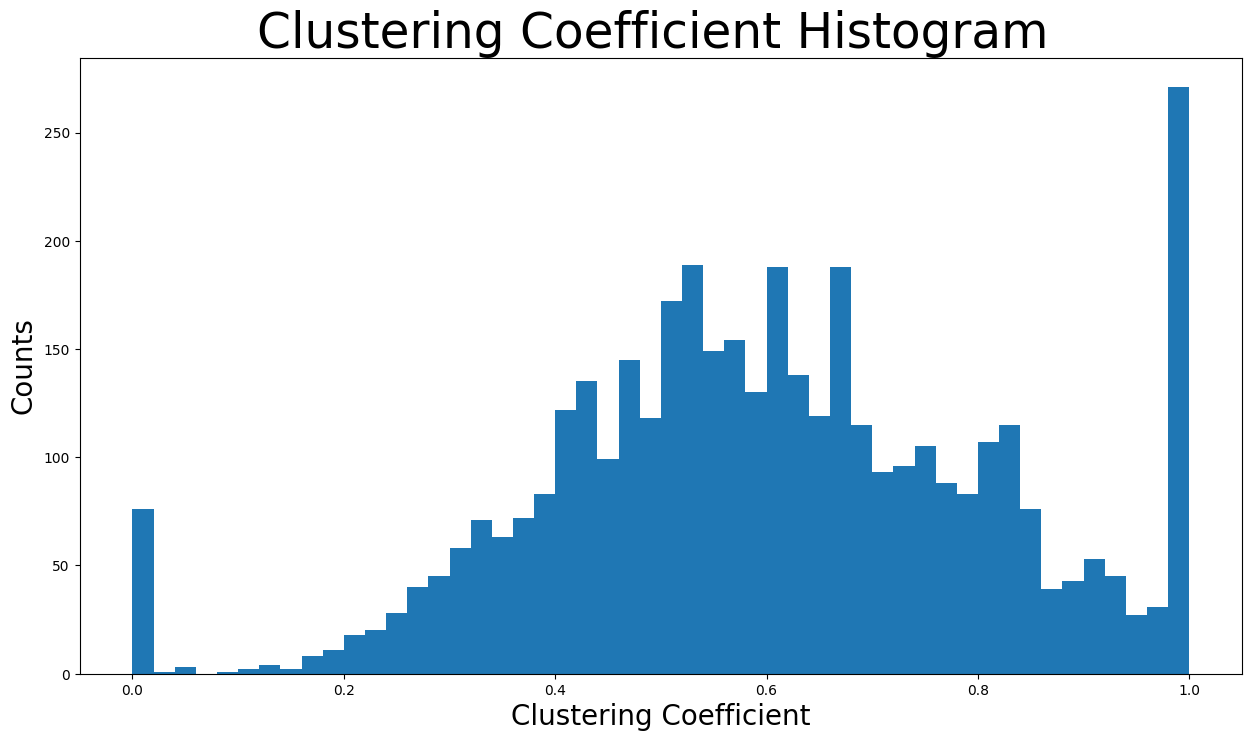

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.hist(nx.clustering(G).values(), bins=50)
plt.title("Clustering Coefficient Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Clustering Coefficient", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})


* **la rete FriendHook è una small world** coefficiente di clustering significativo, diametro basso

## Misure di centralità: i Medici

* per identificare in un grafo i nodi che sono "importanti", "influenti" o "popolari"


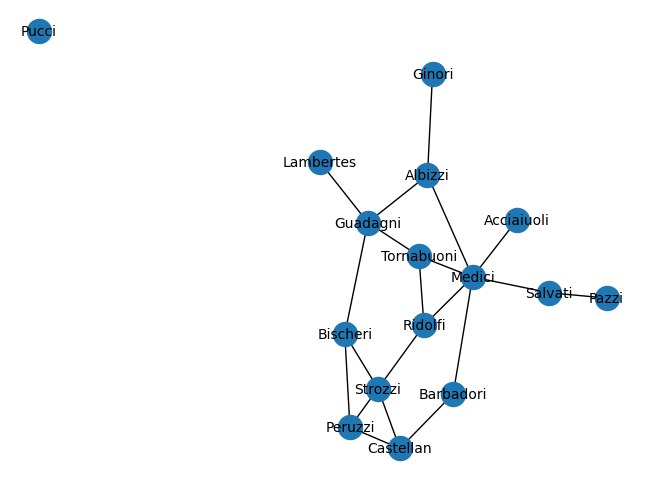

In [25]:
import networkx as nx 
FF=nx.Graph()
FF.add_nodes_from(["Pucci","Peruzzi","Bischeri","Guadagni","Lambertes","Ridolfi","Medici","Albizzi","Pazzi","Salvati","Acciaiuoli","Barbadori","Castellan","Strozzi","Peruzzi","Ginori"])
FF.add_edges_from([("Peruzzi","Bischeri"),("Peruzzi","Strozzi"),("Peruzzi","Castellan"),("Guadagni","Bischeri"),("Guadagni","Lambertes"),("Guadagni","Tornabuoni"),("Guadagni","Albizzi"),("Medici","Tornabuoni"),
("Medici","Salvati"), ("Medici","Acciaiuoli"), ("Medici","Ridolfi"),("Medici","Albizzi"),("Castellan","Barbadori"),("Castellan","Strozzi"),("Ridolfi","Strozzi"), ("Bischeri","Strozzi"),("Ginori","Albizzi"),("Salvati","Pazzi"),("Medici","Barbadori"),("Tornabuoni","Ridolfi") ])             
posFF = nx.spring_layout(FF, iterations=50, seed=173)
nx.draw(FF, with_labels = True, font_size=10,pos=posFF)

* perchè i **Medici** sono una famiglia importante nel 15-esimo secolo?

## Misure di Centralità

* Differeti nozioni di **centralità** di un nodo
    * **Degree**: buona connessione con il resto del grafo
    * **Betweenness**: critica per la connettività 
    * **Closeness**: vicino al resto del grafo
    * **Eigenvector** (pageRank): connesso con nodi **importanti**
* centralità: è una proprietà del singolo nodo, ma nel contesto dell'intero grafo

## Misure di centralità: Degree centrality

* assegna ai nodi un'importanza basata sul numero di archi incidenti nel nodo
* più formalmente, la centralità di un nodo misura la frazione di archi connessi a quel nodo rispetto al numero totale di archi
* appropriata per analisi di reti sociali, un nodo con grado più alto è meglio connesso e può costituire un hub



In [27]:
degree_centrality = nx.centrality.degree_centrality(FF)
print(type(degree_centrality))
(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))

<class 'dict'>


[('Medici', 0.4),
 ('Guadagni', 0.26666666666666666),
 ('Strozzi', 0.26666666666666666),
 ('Peruzzi', 0.2),
 ('Bischeri', 0.2),
 ('Ridolfi', 0.2),
 ('Albizzi', 0.2),
 ('Castellan', 0.2),
 ('Tornabuoni', 0.2),
 ('Salvati', 0.13333333333333333),
 ('Barbadori', 0.13333333333333333),
 ('Lambertes', 0.06666666666666667),
 ('Pazzi', 0.06666666666666667),
 ('Acciaiuoli', 0.06666666666666667),
 ('Ginori', 0.06666666666666667),
 ('Pucci', 0.0)]

## Misure di centralità: Degree centrality in FriendHook

In [28]:
degree_centrality = nx.centrality.degree_centrality(G)  
(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True))[:8]

[(2145, 0.258791480931154),
 (343, 0.1961367013372957),
 (3819, 0.18697374938088163),
 (1775, 0.13546310054482416),
 (2899, 0.08593363051015354),
 (3989, 0.07280832095096582),
 (3820, 0.07206537890044576),
 (2368, 0.0629024269440317)]

* analisi del numero di vicini dei nodi che hanno maggior valore di centralità
* in **FriendHook**, i nodi con alta centralità sono probabilmente quelli da cui si è partiti per considerare le **ego networks**

## Distribuzione della Degree Centrality in FriendHook

Text(0, 0.5, 'Numero Nodi')

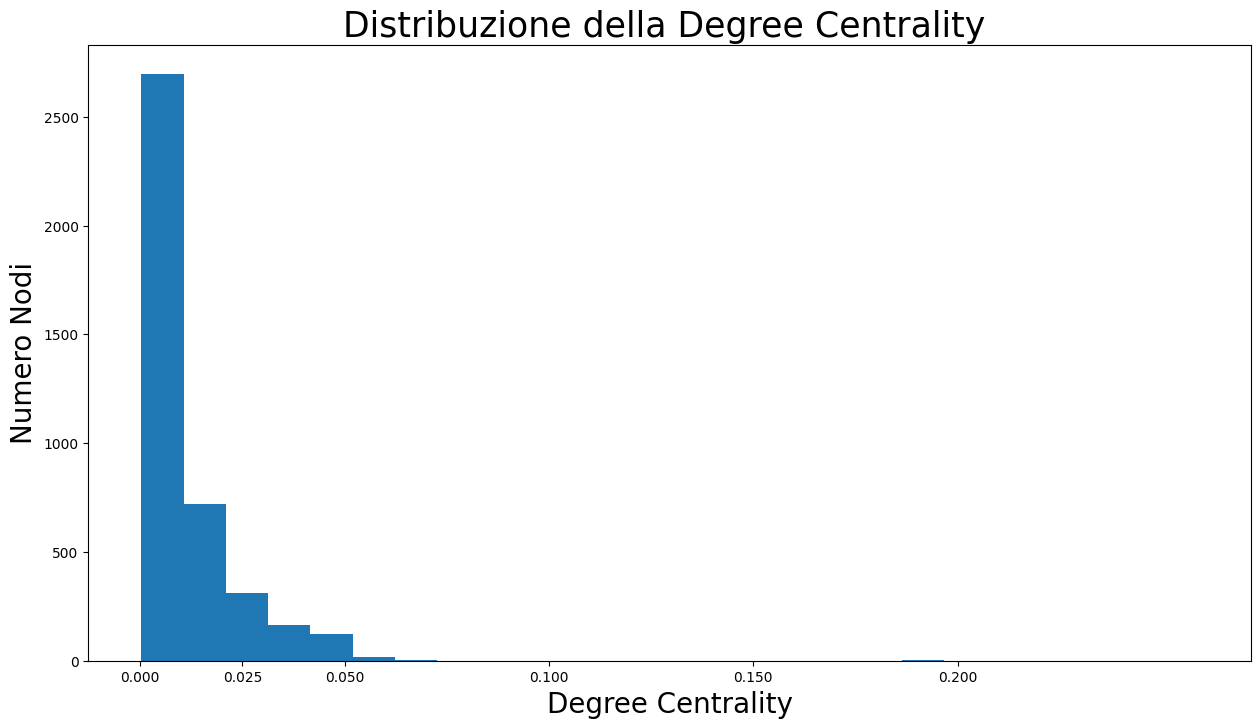

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2]) 
plt.title("Distribuzione della Degree Centrality ", fontdict={"size": 25}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Numero Nodi", fontdict={"size": 20})

## Distribuzione della Degree Centrality in FriendHook: Scala logaritmica

Text(0, 0.5, 'Numero Nodi')

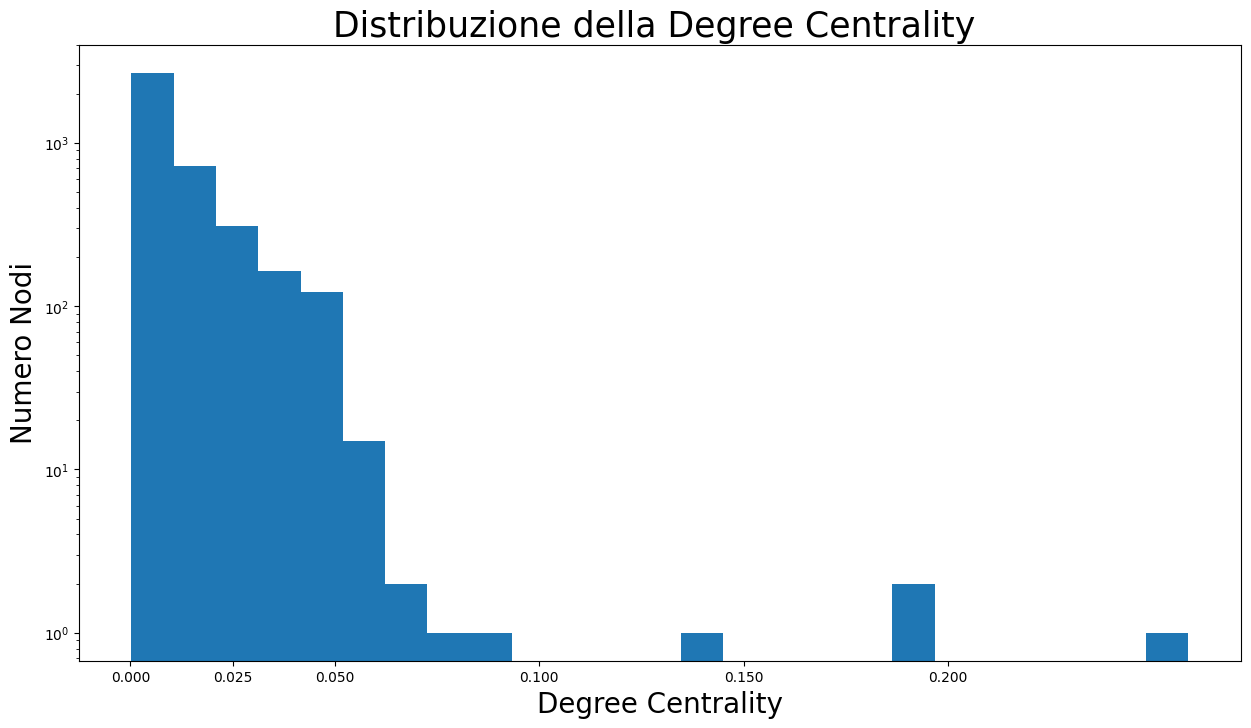

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.hist(degree_centrality.values(), bins=25,log=True)
plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2]) 
plt.title("Distribuzione della Degree Centrality ", fontdict={"size": 25}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Numero Nodi", fontdict={"size": 20})

## Visualizzazione della centralità dei nodi: degree centrality

(np.float64(-1.203868659734726),
 np.float64(1.145474942922592),
 np.float64(-1.061851696074009),
 np.float64(1.1813898244500158))

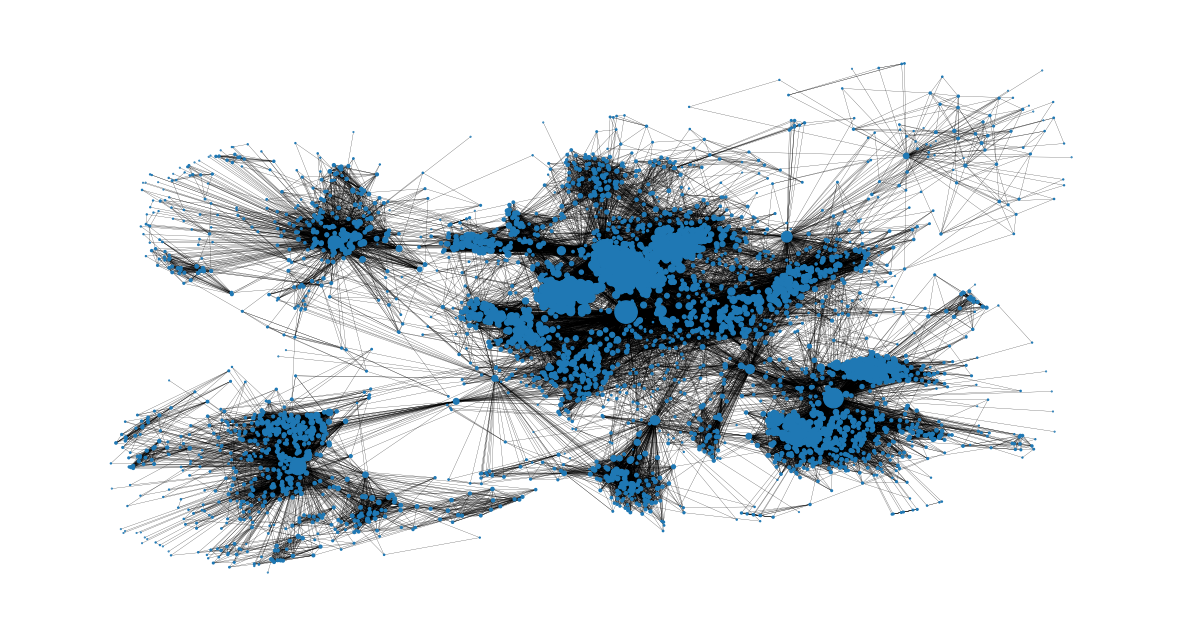

In [31]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
node_size = [v * 1000 for v in degree_centrality.values()]  
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

## Misure di centralità: Betweeness Centrality delle famiglie fiorentine

In [32]:
betweenness_centrality_FF = nx.centrality.betweenness_centrality(FF)
(sorted(betweenness_centrality_FF.items(), key=lambda x: x[1], reverse=True))

[('Medici', 0.45238095238095244),
 ('Guadagni', 0.22063492063492063),
 ('Albizzi', 0.1841269841269841),
 ('Salvati', 0.12380952380952381),
 ('Ridolfi', 0.09841269841269841),
 ('Bischeri', 0.09047619047619049),
 ('Strozzi', 0.0888888888888889),
 ('Barbadori', 0.08095238095238096),
 ('Tornabuoni', 0.07936507936507937),
 ('Castellan', 0.04761904761904762),
 ('Peruzzi', 0.01904761904761905),
 ('Pucci', 0.0),
 ('Lambertes', 0.0),
 ('Pazzi', 0.0),
 ('Acciaiuoli', 0.0),
 ('Ginori', 0.0)]

## Misure di centralità: Betweeness Centrality

In [33]:
betweenness_centrality = nx.centrality.betweenness_centrality(G)  
(sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(2145, 0.4805180785560152),
 (343, 0.3377974497301997),
 (1775, 0.236115357358927),
 (3819, 0.22929533958687828),
 (1659, 0.1490150921166576),
 (2899, 0.14630592147443144),
 (3437, 0.11533045020561003),
 (1977, 0.09631033121856167)]

* il nodo **2145** ha una centralità di **0.48**, ovvero viene attraversato dalla metà dei cammini minimi
* confrontiamo i valori della betweness centrality (sopra elencati) con quelli della degree centrality, riportati sotto
    
    ```python
  (2145, 0.258791480931154),
  (343, 0.1961367013372957),
  (3819, 0.18697374938088163),
  (1775, 0.13546310054482416),
  (2899, 0.08593363051015354),
  (3989, 0.07280832095096582),
  (3820, 0.07206537890044576),
  (2368, 0.0629024269440317)
    ```


## Misure di centralità: Betweeness Centrality

* alcuni nodi sono in entrambe le liste
* esistono nodi, come il **1659**, che betweeness centrality alta e degree centrality bassa
* un nodo
    * con pochi vicini (amici)
    * ma che si comporta come un **bridge** tra sottoreti diverse

## Distribuzione della betweeness centrality

Text(0, 0.5, 'Counts')

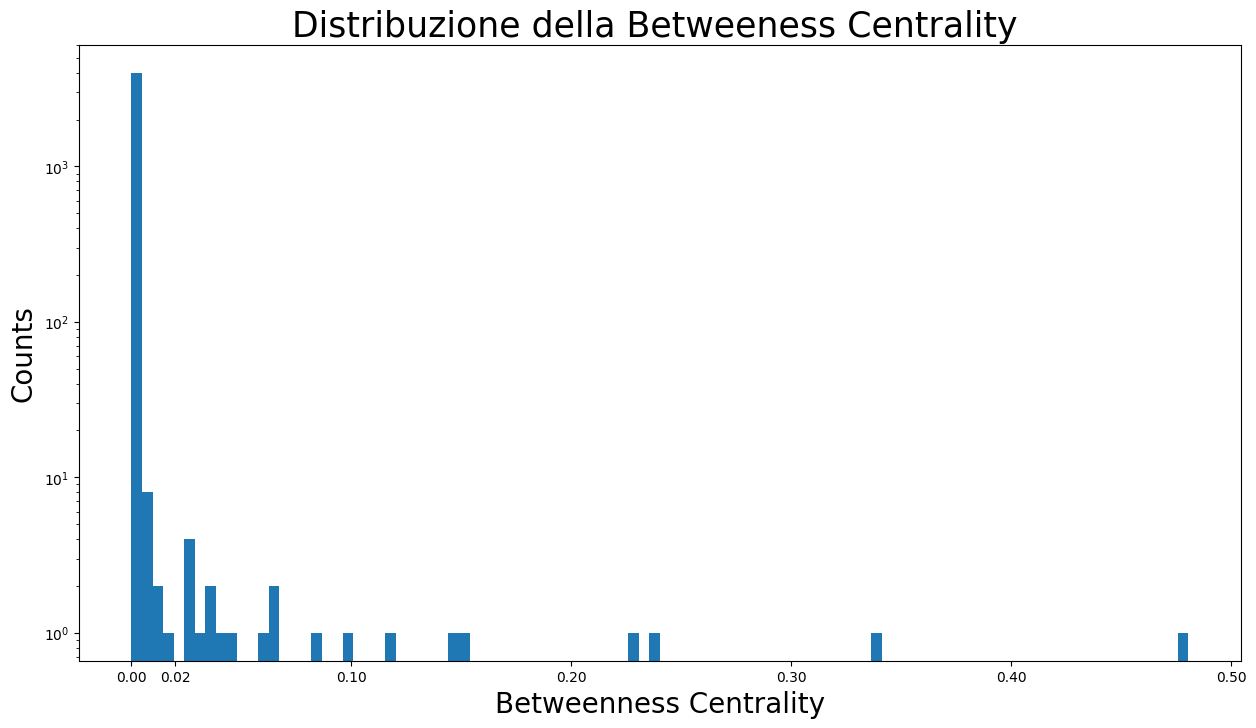

In [37]:
plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=100)
plt.xticks(ticks=[0, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5])  # set the x axis ticks
plt.title("Distribuzione della Betweeness Centrality ", fontdict={"size": 25}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.yscale('log')
plt.ylabel("Counts", fontdict={"size": 20})


## Visualizzazione della centralità dei nodi: betweness centrality

(np.float64(-1.203868659734726),
 np.float64(1.145474942922592),
 np.float64(-1.061851696074009),
 np.float64(1.1813898244500158))

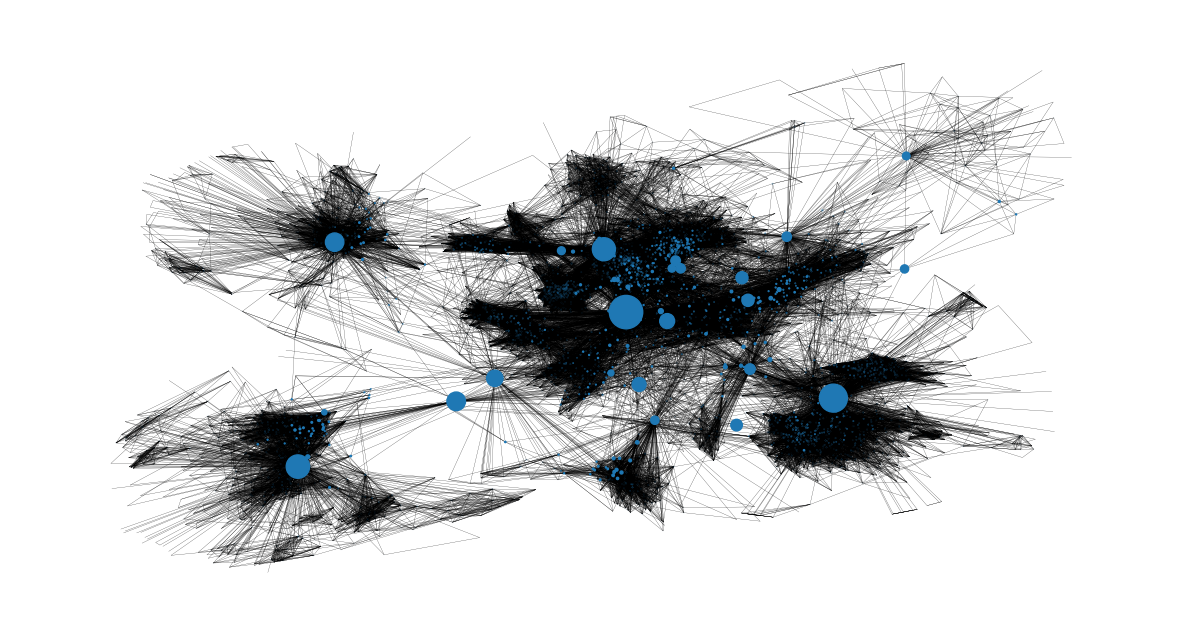

In [36]:
node_size = [
    v * 1200 for v in betweenness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")


## Misure di Centralità: Closeness Centrality

* misura la distanza media del nodo ripetto agli altri nodi della rete
    * piu' i valori della closeness centrality sono elevati piu' il nodo e' **centrale**    
* Il metodo per il calcolo della closeness centrality  è:
```python
closeness_centrality(G, u=None, distance=None, wf_improved=True, reverse=False)
```
* può essere utilizzata, ad esempio, per studiare una buona strategia di propagazione delle **fake news** o dei **virus**
    * un utente con alta **closeness centrality** può diffondere un virus oppure una fake news più rapidamente
    * l'intera rete viene raggiunta rapidamente
 


## Misure di Centralità: Closeness Centrality delle famiglie fiorentine

* non è importante avere tanti amici
* o essere in una posizione strategica
* è importante stare in una **posizione centrale** del grafo, vicina al resto del grafo

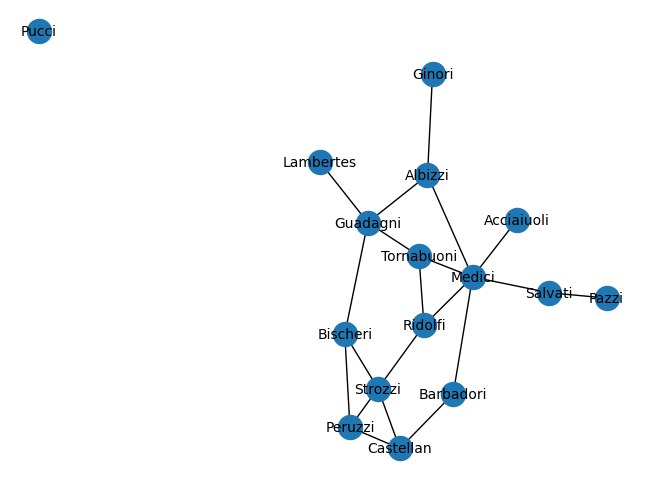

In [34]:
 nx.draw(FF, with_labels = True, font_size=10,pos=posFF) 

* **Acciauoli** ha una degree centrality uguale a 1, betwenness uguale a 0, ma è **distante solo un hop dai Medici**

## Misure di Centralità: Closeness Centrality

In [38]:
closeness_centrality_FF = nx.centrality.closeness_centrality(FF)  
(sorted(closeness_centrality_FF.items(), key=lambda item: item[1], reverse=True))

[('Medici', 0.5226666666666667),
 ('Ridolfi', 0.4666666666666667),
 ('Albizzi', 0.4505747126436782),
 ('Tornabuoni', 0.4505747126436782),
 ('Guadagni', 0.4355555555555556),
 ('Barbadori', 0.4083333333333333),
 ('Strozzi', 0.4083333333333333),
 ('Bischeri', 0.37333333333333335),
 ('Salvati', 0.362962962962963),
 ('Castellan', 0.362962962962963),
 ('Peruzzi', 0.343859649122807),
 ('Acciaiuoli', 0.343859649122807),
 ('Ginori', 0.3111111111111111),
 ('Lambertes', 0.3038759689922481),
 ('Pazzi', 0.26666666666666666),
 ('Pucci', 0.0)]

## Misure di Centralità: Closeness Centrality in Friendhook

In [39]:
closeness_centrality = nx.centrality.closeness_centrality(G)  
(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:8]

[(2145, 0.45969945355191255),
 (2847, 0.3974018305284913),
 (3747, 0.3948371956585509),
 (467, 0.3939127889961955),
 (343, 0.39360561458231796),
 (3528, 0.37049270575282134),
 (1787, 0.36991572004397216),
 (370, 0.3698479575013739)]

## Distribuzione della closeness centrality

Text(0, 0.5, 'Counts')

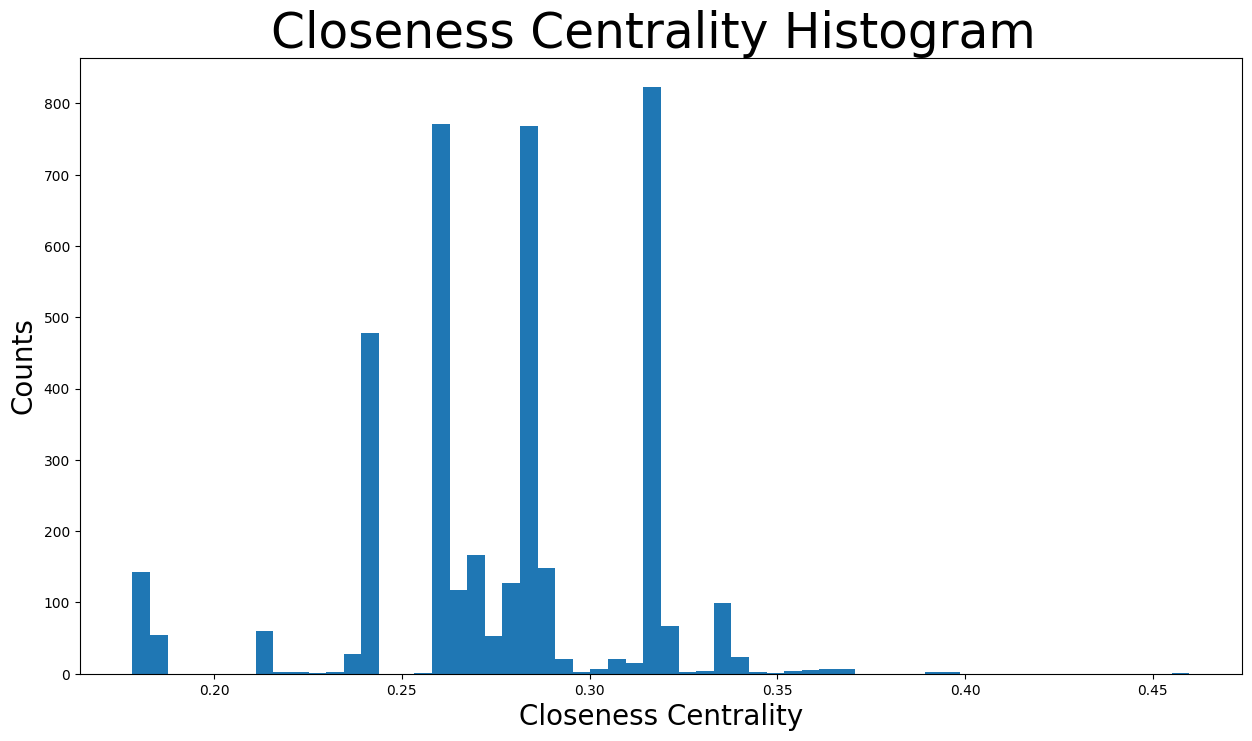

In [40]:
plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=60)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

## Visualizzazione della centralità dei nodi: closeness centrality

(np.float64(-1.203868659734726),
 np.float64(1.145474942922592),
 np.float64(-1.061851696074009),
 np.float64(1.1813898244500158))

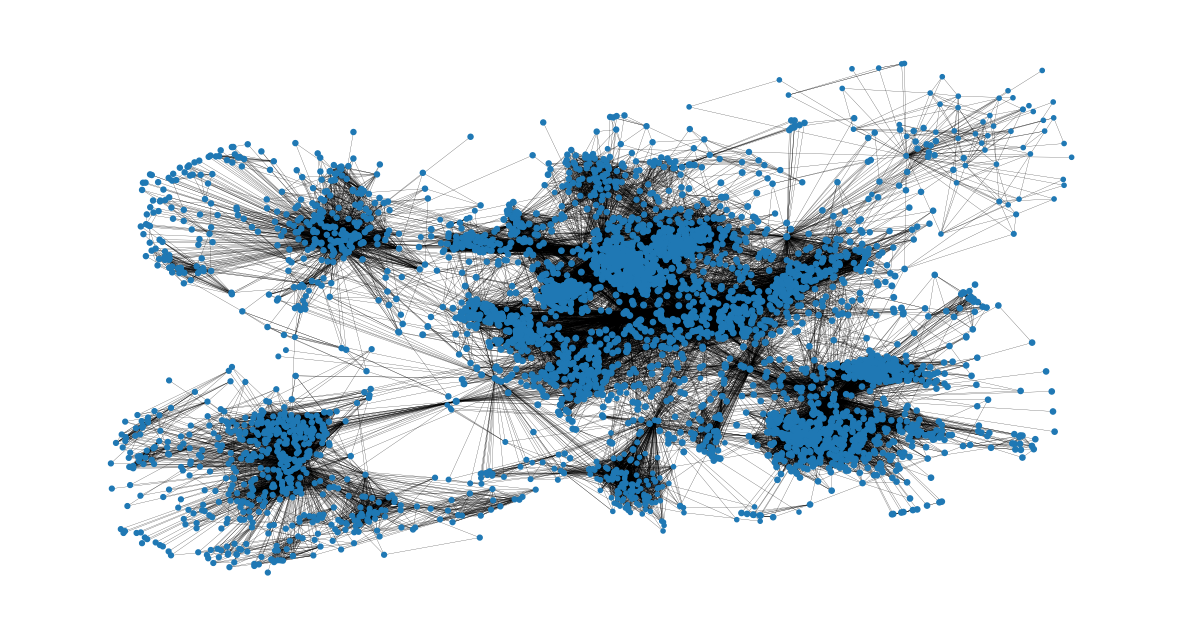

In [41]:
node_size = [
    v * 50 for v in closeness_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

## Misure di centralità: Eigenvector centrality

* idea di base: l'**importanza** di un nodo in un grafo è determinata dall'**importanza dei nodi vicini**
    * definizione ricorsiva
* molto rilevante per il grafo del web
* implementata per grafi diretti dall'algoritmo **PageRank**, la maggiore innovazione tecnologica di **Google**
* sul web, quello che conta non è quante pagine puntano ad una certa pagina, ma **quali** pagine puntano ad una certa pagina
* **slashdot effect**
* il nome: la soluzione del sistema ricorsivo equivale a risolvere gli **eigenvector** di una matrice
* in NetworkX
```python
eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight=None)
```
    

## Misure di centralità: Eigenvector centrality

In [42]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(G)  
(sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:10]

[(3819, 0.09540696149067632),
 (84, 0.08698327767886553),
 (1601, 0.0860523927058434),
 (3059, 0.08517340912756596),
 (2860, 0.0842787747567609),
 (261, 0.08419311897991796),
 (1279, 0.0841557356805503),
 (2570, 0.08413617041724976),
 (1344, 0.08367141238206226),
 (1651, 0.0835324284081597)]

## Distribuzione della Eigenvector centrality


Text(0, 0.5, 'Counts')

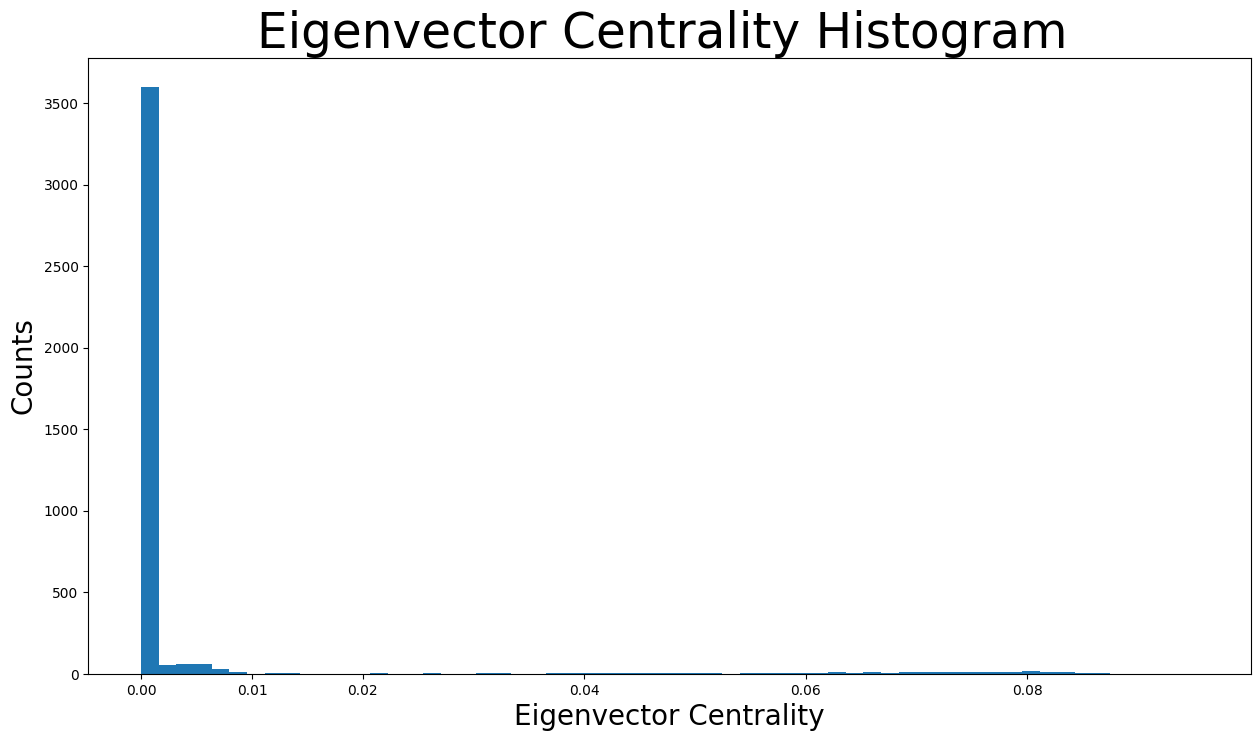

In [43]:
plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=60)
plt.xticks(ticks=[0, 0.01, 0.02, 0.04, 0.06, 0.08])  # set the x axis ticks
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

## Visualizzazione della centralità dei nodi: Eigenvector centrality

(np.float64(-1.203868659734726),
 np.float64(1.145474942922592),
 np.float64(-1.061851696074009),
 np.float64(1.1813898244500158))

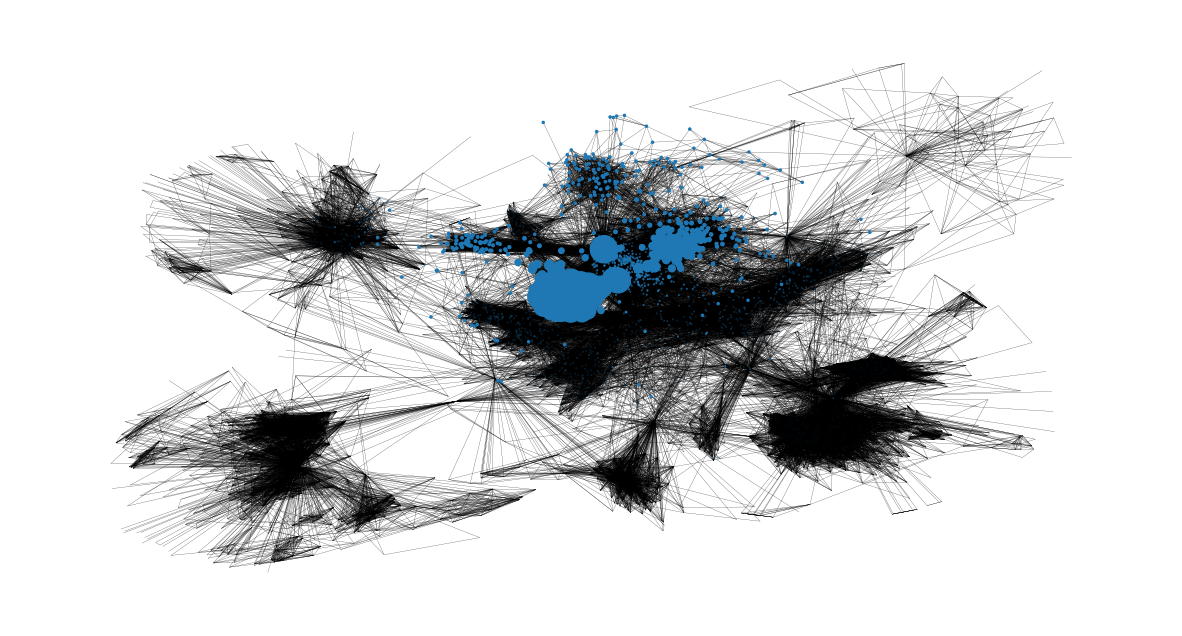

In [44]:
node_size = [
    v * 4000 for v in eigenvector_centrality.values()
]  # set up nodes size for a nice graph representation
plt.figure(figsize=(15, 8))
nx.draw_networkx(G, pos=pos, node_size=node_size, with_labels=False, width=0.15)
plt.axis("off")

## Ricapitolando...proprietà di un grafo

* Caratteristiche **globali** del grafo
    * Degree distribution
    * connettività
    * lunghezza media dei cammini
    * diametro
    *densità
* Caratteristihe locali
    * Degree
    * Local clustering coefficient
* Centralità: posizionde di un singolo nodo nel contesto di un grafo
    * Degree
    * Betweeness
    * Closeness
    * Eigenvector

## Il concetto di comunità

* obiettivo: trovare le comunità all'interno di una rete
* non esiste una definizione condivisa di comunità
    * intuizione: esiste un maggior numero di archi tra i nodi della stessa comunità rispetto a quelli esistenti tra diverse 
* **Community Detection**
 * è il processo di identificazione di gruppi di nodi all'interno di una rete
 * i nodi all'interno dello stesso gruppo (comunità) sono più **densamente connessi** tra loro rispetto ai nodi appartenenti a gruppi diversi
 * partiamo dalla definizione del concetto di **partizione** di una rete
comunità

## Partizione di una rete

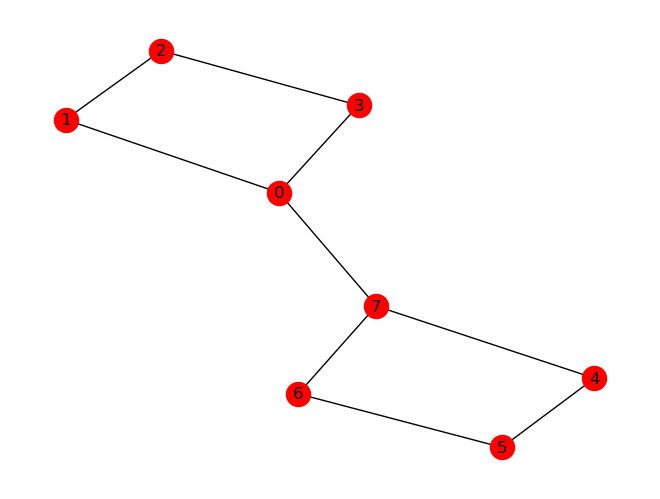

In [1]:
import random
import networkx as nx

G = nx.Graph()
nx.add_cycle(G, [0, 1, 2, 3])
nx.add_cycle(G, [4, 5, 6, 7])
G.add_edge(0, 7)

nx.draw(G, node_color='red', with_labels=True)

## Partizionare il grafo

In [4]:
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

nx.community.is_partition(G, partition)


True

* spesso si utilizza una **mappa di partizione**
* un dizionario che associa i nomi dei nodi a un indice di partizione. 
* utile per confrontare rapidamente se due nodi appartengono allo stesso **cluster nella partizione**

In [ ]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

## Colorare le partizioni

In [ ]:
node_colors = [partition_map[n] for n in G.nodes]
nx.draw(G, node_color=node_colors, with_labels=True)

## Il concetto di modularità

* la community detection consiste nel trovare una partizione che raggiunga una buona separazione tra i gruppi di nodi. 
* occorre però un modo per misurare quanto sia buona la partizione. 
* una misura molto utilizzata è quella di **modularità**
    * confronta il numero di archi intra-gruppo con un valore di riferimento casuale. 
    * punteggi di modularità più alti corrispondono a una maggiore proporzione di archi intra-gruppo, e a un numero inferiore di archi inter-gruppo e quindi a una migliore separazione dei gruppi.

## Il calcolo della modularità


\begin{equation}
    Q_w=\frac{1}{L}\sum_C \left(L_C-\frac{k_C^2}{4L}\right),
    \label{eq:wmodul}
\end{equation}
dove:
* $C$ itera su tutte le partizioni
* $L$ numero totale di archi della rete 
* $L_C$ numero di archi interni $C$ 
* $k_C$ somma dei gradi dei nodi della partizione $C$




## Il concetto di modularità

In [ ]:
def modularity(G, partition):
    W = G.number_of_edges()
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n) for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = C.number_of_edges()
        summation += W_c - s_c ** 2 / (4 * W)   
    return summation / W

## Il concetto di modularità

In [ ]:
modularity(G, partition)

In [ ]:
partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
modularity(G, partition_2)

## Modularità: la funzione di NetworkX

In [ ]:
nx.community.quality.modularity(G, partition_2)

## Zachary's karate club

* un rete di benchmak famosa, tanto che è presente in **NetworkX**
* contiene 34 nodi, che rappresentano i **membri di un club di karate** le cui interazioni sono state monitorate per tre anni dai ricercatori. 
* I collegamenti nel grafo rappresentano le interazioni tra i membri al di fuori delle attività del club, usate come indicatore dei legami sociali.
* durante lo studio, un conflitto tra l'istruttore **Mr. Hi (nodo 0)** e il presidente o **Officer (nodo 33)** portò alla divisione del club in due gruppi separati, guidati rispettivamente da Mr. Hi e dall’Officer. 
* sappiamo quali membri hanno seguito ciascun leader dopo la scissione, fornendo così etichette empiriche per le comunità:
    * i membri che hanno seguito Mr. Hi costituiscono una comunità.
    * i membri che hanno seguito l'Officer costituiscono l'altra comunità.
* la composizione dei gruppi post-scissione è stata fortemente influenzata dai legami sociali: i membri dello stesso gruppo di amici rimangono e nello stesso club dopo la divisione. 

## Zachary's karate club

In [ ]:
K = nx.karate_club_graph()
nx.draw(K, node_color='red', with_labels=True)

## Zachary's karate club

In [ ]:
K.nodes[0]

In [ ]:
K.nodes[9]

## Zachary's karate club

In [ ]:
K = nx.karate_club_graph()
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K, node_color=node_colors, with_labels=True)

## Zachary's karate club

In [ ]:
groups = {
    'Mr. Hi': set(),
    'Officer': set(),
}

for n in K.nodes:
    club = K.nodes[n]['club']
    groups[club].add(n)    
groups

## Zachary's karate club

In [ ]:
empirical_partition = list(groups.values())
empirical_partition

In [ ]:
nx.community.quality.modularity(K, empirical_partition)

## Zachary's karate club

* A scopo di confronto, generiamo una partizione casuale di questa rete e calcoliamo la sua modularità. 
* generiamo un campione casuale di 17 nodi, ovvero la metà del numero totale di nodi, e li assegniamo a una comunità. 
* La seconda comunità include quindi i nodi del grafo che non appartengono alla prima comunità.

In [ ]:
random_nodes = random.sample(sorted(K.nodes), 17)
random_partition = [set(random_nodes),
                    set(K.nodes) - set(random_nodes)]
random_partition

## Zachary's karate club

In [ ]:
random_node_colors = ['orange' if n in random_nodes else 'lightblue' for n in K.nodes]
nx.draw(K, node_color=random_node_colors)

In [ ]:
nx.community.quality.modularity(K, random_partition)